In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

import numpy as np
np.set_printoptions(linewidth=110)

<font color='red'> <center>
# Machine Learning: Unsupervised learning 
# (Part I)


### Why studying clustering? ###

**Use and applications:** 
This task has many applications in different domains:

+ Categorize **documents** of similar topics.
+ Group **individuals** that have similar political view.
+ **Social network** analysis.
+ **Market segmentation**/ building customer profiles for market analysis.
+ Detection of **near duplicates**.
+ Group **genes** that perform the same function.
+ **Astronomical** data analysis.
+ **Compression**.


<center><img src="images/facebook.png"></center>
<center><tiny>Facebook networks.</small></center>


## INDEX:##

1. **Introduction to unsupervised learning**

2. **Clustering**

 2.1 Important questions in clustering

 2.2 Similarity and distance

 
3. **Taxonomy of clustering**

    3.1 Clustering techniques - k-means
    
4. Quality evaluation
5. **Hierarchical clustering**

6. **Spectral clustering**
- 6.1 Definition
- 6.2 Comparing different clustering algorithms on toy datasets

7 Examples 
 

In [ ]:
from IPython.display import HTML

HTML('http://blog.stephenwolfram.com/2013/04/data-science-of-the-facebook-world/')

# 1. Introduction to unsupervised learning

In machine learning, the problem of unsupervised learning is that of trying to **find hidden structure in unlabeled data**. Since the examples given to the learner are unlabeled, there is **no error or reward signal** to evaluate a potential solution. This distinguishes unsupervised learning from supervised learning. 

Unsupervised learning is defined as the set of algorithms which learns from a **training set of unlableled or unannotated** examples, using the features of the inputs to categorize them together according to some **geometric** or **statistical** criteria. 

<center><img src="images/clustering of genes.gif">
</center>
<center><small>(a) The data set contains four clusters of different sizes, shapes and numbers of genes. Left: each dot represents a gene, plotted against its expression value under the two experimental conditions. Euclidean distance, which corresponds to the straight-line distance between points in this graph, was used for clustering. Right: the standard red-green representation of the data and corresponding cluster identities. (b) Hierarchical clustering finds an entire hierarchy of clusters. The tree was cut at the level indicated to yield four clusters. Some of the superclusters and subclusters are illustrated on the left. (c) k-means (with k = 4) partitions the space into four subspaces, depending on which of the four cluster centroids (stars) is closest. (d) SOM finds clusters, which are organized into a grid structure (in this case a simple 2 times 2 grid).

From the following article:
How does gene expression clustering work?
Patrik D'haeseleer, [Nature Biotechnology 23, 1499 - 1501 (2005)](http://www.nature.com/nbt/journal/v23/n12/fig_tab/nbt1205-1499_F1.html)
doi:10.1038/nbt1205-1499
        </small></center>

Unsupervised learning encompasses many techniques that seek to **summarize and explain key features** of the data. Many methods employed in unsupervised learning are based on *data mining* methods used to preprocess data.

Different *kinds* of unsupervised learning problems:

+ *Clustering:* partition examples into groups when no pre-defined categories/classes are available.
+ *Dimensionality reduction:* principal component analysis, independent component analysis, non-negative matrix factorization.
+ *Outlier detection:* find unusual events (e.g. malfunction).
+ *Novelty detection:* find changes in data.

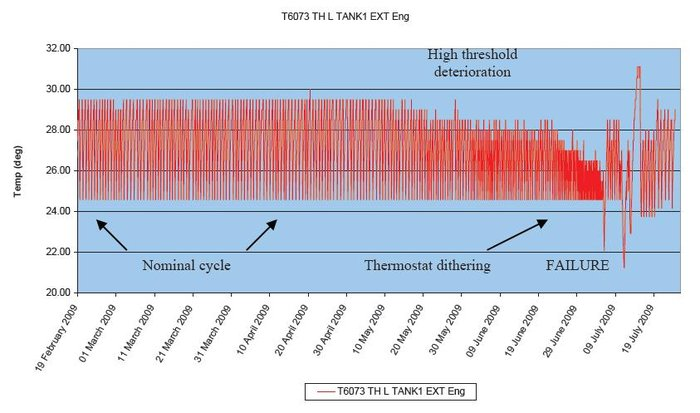

The most common unsupervised task is **clustering**. In this notebook, we will focus on the clustering and dimensionality reduction (in brief) tasks.

# 2. Clustering

**Partition** unlabeled examples into *disjoint subsets of clusters*, such that:

+ Examples within a cluster are similar (*high intra-class* similarity).
+ Examples in different clusters are different (*low inter-class* similarity).

It can help in discovering new categories in an unsupervised manner (no sample category labels provided).

## 2.1 Important questions in clustering

+ What is a *natural grouping* among these objects? 
    + Definition of "groupness"
    + Definition of "similarity/distance"

+ *How to group* samples?

+ *How many* clusters?
    + Fixed a priori?
    + Completely data driven?
    + Avoid “trivial” clusters - too large or small...
    + Which methods do work when the number of samples is huge?
    + Which methods do work when the number of classes is huge?, etc.

+ *What* is a *good grouping*? 
    + What objective measures can be defined to evaluate the quality of the clusters?

+ In which space to *group*? 
    + What to do in high-dimensional feature spaces?
 

<div class="alert alert-info"> 
*** IMPORTANT IDEA: Clustering is subjective issue.
</div>

Clustering will help us to analyze and get insight of the data, but the quality of the partition **depends on the application and the analyst**.

## 2.2 Similarity and distance

The notion of similarity is a tough one, however we can use the notion of distance as a surrogate.

The most wide spread distance metric is the Minkowski distance:

$$d(a,b) = \big(\sum\limits_{i=1}^d |a_i-b_i|^p \big)^{1/p}$$

The most well-known instantiations of this metric are: 

+ $p = 2$ we have Euclidean distance, 
+ $p=1$ Manhattan distance, and 
+ $p=\infty$ max-distance.

<center><img src="images/L1-norm-and-L2-norm-distance.png">
    
**Note** that the path with min L2 norm is unique, but it is not true for L1-norm!


# 3 Clustering techniques: how to group samples?

### 3.1 Taxonomy of clustering algorithms:

There are two big families of clustering techniques:

+ *Partitional algorithms:* Start with a random partititon and refine it iteratively.
+ *Hierarchical algorithms:* Agglomerative (bottom-up), top-down.

**Partitional algorithms**

Partitional algorithms can be divided in two branches:

+ *Hard partition* algorithms, such as *K-means*, assign a unique cluster value to each element in the feature space.
+ *Soft partition* algorithms, such as *Mixture of Gaussians*, can be viewed as density estimators and assign a confidence or probability to each point in the space.

In order to build our intuition about clustering, we will start with the simplest, but one of the famest methods: K-means.

### 3.2 K-means algorithm

**Algorithm:**
1. Initialize the value  $K$ of desirable clusters.
2. Initialize the $K$ cluster centers, e.g. randomly.
3. Decide the class memberships of the N data samples by assigning them to the nearest cluster centroids (e.g. the center of gravity or mean).
4. Re-estimate the $K$ cluster centers, by assuming the memberships found above are correct.
5. If none of the N objects changed membership in the last iteration, exit. Otherwise go to 3.

Let us see this in action:

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1.2*np.random.randn(MAXN,2)])
X.shape

In [ ]:
#Just for visualization purposes, create the labels of the three distributions
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

#display
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as the algorithm sees it', size=14)
plt.gcf().set_size_inches((17,6))


#distinguish different distributions
plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as were generated',size=14)
plt.gcf().set_size_inches((17,6))




In [ ]:
from sklearn import cluster

K=3 # Assuming to be 3 clusters!

clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

**Note**: Each clustering algorithm comes in two variants: 
- a class, that implements the **fit** method to learn the clusters on train data, and 
- a **predict** function, that, given test data, returns an array of integer labels corresponding to the different clusters. 

For the class, the labels over the training data can be found in the **labels_** attribute.
    

In [ ]:
print(clf.labels_[1:45])    # or
print(clf.predict(X)[1:45]) # equivalent

In [ ]:
#Let's visualize the kmeans clustering on the space:
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()] # c_ translates slice objects to concatenation along the second axis.
print(data)

In [ ]:
Z=clf.predict(data) # returns the labels of the data
print(Z[1:45])

### 3.2.1 **How many "misclusterings" do we have?**

In [ ]:
# Visualize space partition
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
#Plot original distributions
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((9,9))

### 3.2.2 Implementing the kmeans
(OPTIONAL) Let's perform a hand-made step by step kmeans analysis:

In [ ]:
# Select centroids

from sklearn import cluster
from scipy.spatial.distance import cdist
K=3

#Select three centroids: for example, the first three elements of the data and visualize them by black circles
C=X[:3,:]

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2, zorder=10)

fig = plt.gcf()
fig.set_size_inches((8,8))

In [ ]:
# Determine partition according to centroids
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean') 
                            #Computes distance between each pair of the two collections of inputs.
print(Y)

In [ ]:
#Which is the label of the closest point?
Z = np.argmin(Y,axis=1) 

In [ ]:
print('Obtained labels: ', Z)
print(Z.reshape(sz))

In [ ]:
# Visualize
plt.title('Space partitions at iteration 1', size=14)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2)

fig = plt.gcf()
fig.set_size_inches((9,9))

In [ ]:
#Compute membership for next iteration
Y = cdist(X, C, 'euclidean')
y_pred = np.argmin(Y,axis=1) #finds the minimum in each row, that is the closest center
print(y_pred[1:20])

In [ ]:
#Update centroids
for i in range(K):
    C[i,:]=np.mean(X[y_pred==i,:],axis=0)

In [ ]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black',linewidths=2,zorder=10)

fig = plt.gcf()
fig.set_size_inches((9,9))

In [ ]:
#And the new area of influence is
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r') # painting original labels with colors
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

#Painting seeds
plt.scatter(C[:,0],C[:,1],s=120, facecolors='black', linewidths=2,zorder=10)

#Painting the hyperplanes
x = np.linspace(-5,15,200) 
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1) # Determine to whom centroid each point is closest

#Visualize
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions at iteration 2', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

 This process is repeated until the centroids stabilize.

### 3.2.3 Comparing the results to the ground truth


In [ ]:

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0) #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
Zx=clf.predict(X)

plt.subplot(1,3,1)
plt.title('Original labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r') # r
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')  # g
fig = plt.gcf()
fig.set_size_inches((15,6))

plt.subplot(1,3,2)
plt.title('Data without labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')  # g
fig = plt.gcf()
fig.set_size_inches((15,6))

plt.subplot(1,3,3)
plt.title('Clustering labels', size=14)
plt.scatter(X[(Zx==1).ravel(),0],X[(Zx==1).ravel(),1],color='r')
plt.scatter(X[(Zx==2).ravel(),0],X[(Zx==2).ravel(),1],color='b')
plt.scatter(X[(Zx==0).ravel(),0],X[(Zx==0).ravel(),1],color='g')
fig = plt.gcf()
fig.set_size_inches((13.4,6))


### 3.2.4 Kmeans as a minimization procedure 

The K-means algorithm clusters data by trying to separate samples in $n$ groups of equal variance. In other words, the K-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean of the samples in the cluster. The means are commonly called the cluster **“centroids”**. 

      Shell the centroids belong to the original set of points?

The K-means algorithm aims to choose centroids minimizing a criterion known as the **inertia** <inertia> or **within-cluster** sum-of-squares:

  <center>
  Inertia=$\displaystyle\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_{i,j} - \mu_j||^2)$

**Inertia**, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. 

Several issues should be taken into account:

+ What are the parameters of the algorithm?
    - This algorithm requires the **number of clusters to be specified**. 

+ Is it deterministic? - depends on the **initialization**.
+ Inertia makes the **assumption** that clusters are **convex and isotropic** (WHY?), which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

+ Can the algorithm assures **converging** to the global minimum? 

+ It scales well to **large number of samples** and has been used across a large range of application areas in many different fields.






The computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization.

    

## 4 What is a good clustering? Defining metrics to measure clustering quality

The **Rand index** or **Rand measure** (named after William M. Rand) in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the **adjusted Rand index**. From a mathematical standpoint, Rand index is related to the accuracy, but is applicable even when class labels are not used.

Given a set of n elements $S = \{o_1, \ldots, o_n\}$ and two partitions of S to compare, $X = \{X_1, \ldots, X_r\}$, a partition of $S$ into $r$ subsets, and $Y = \{Y_1, \ldots, Y_s\}$, a partition of $S$ into $s$ subsets, define the following:

+ a, the number of pairs of elements in S that are in the same set in X and in the same set in Y
+ b, the number of pairs of elements in S that are in different sets in X and in different sets in Y
+ c, the number of pairs of elements in S that are in the same set in X and in different sets in Y
+ d, the number of pairs of elements in S that are in different sets in X and in the same set in Y.

**Definition**: The Rand index, R, is:
$ R = \frac{a+b}{a+b+c+d} = \frac{a+b}{{n \choose 2 }}$




## 4.1 Compute the **homogeneity, completeness and V-Measure scores**###

A clustering result satisfies **homogeneity** if all of its clusters contain only data points which are members of the same original (a single) class.

A clustering result satisfies **completeness** if all the data points that are members of a given class are elements of the same automatic cluster.

Both scores have positive values between 0.0 and 1.0, larger values being desirable.


In [ ]:
from sklearn import metrics

metrics.homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

In [ ]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))

In [ ]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

In [ ]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))

In [ ]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

In [ ]:
print(metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))

In [ ]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))

In [ ]:
print(metrics.completeness_score([0, 1, 2, 3], [0, 0, 1, 1]))

In [ ]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 1, 0, 1]))

In [ ]:
print(metrics.completeness_score([0, 0, 0, 0], [0, 1, 2, 3]))

## 4.2 V-measure

**V-measure** cluster labeling given a ground truth:
The V-measure is the *harmonic mean* between homogeneity and completeness:

  $v = 2 * (homogeneity * completeness) / (homogeneity + completeness)$

Is the  metric dependent of the absolute values of the labels?: will a permutation of the class or cluster label values change the score value in any way?

Is the metric symmetric wrt the switching label_true with label_pred?

This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

Perfect labelings are both homogeneous and complete, hence have score 1.0:

In [ ]:
print(metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 1]))

print (metrics.v_measure_score([0, 0, 1, 1], [1, 1, 0, 0]))

**Question:** Labelings that assign **all classes members to the same clusters** are: __, but not __:

In [ ]:
print("%.3f" % metrics.completeness_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.homogeneity_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 0, 0]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 2], [0, 0, 1, 1]))

print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 1, 1]))

Labelings that have **pure clusters with members coming from the same classes** are _____________ but un-necessary splits harm ____________ and thus penalize V-measure as well:

In [ ]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 2]))

print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 1, 2, 3]))

If classes members are **completely split across different clusters**, the assignment is totally incomplete, hence the V-Measure is null:

In [ ]:
print("%.3f" % metrics.v_measure_score([0, 0, 0, 0], [0, 1, 2, 3]))

Clusters that include samples from totally different classes totally destroy the ____ of the labeling, hence:


In [ ]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 0, 0]))

### Summary
**Advantages**

+ *Bounded scores?*: 
    - 0.0 is as bad as it can be, 1.0 is a perfect score.

+ *Intuitive interpretation*: 

    - clustering with bad V-measure can be qualitatively analyzed in terms of homogeneity and completeness to better feel what ‘kind’ of mistakes is done by the assignment.

+ *Assumption?* 

    - No assumption is made on the cluster structure: can be used to compare clustering algorithms such as K-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks**

+ These metrics require the **knowledge of the ground truth classes** while almost never available in practice or require manual assignment by human annotators (as in the supervised learning setting).

+ The previously introduced metrics are **not normalized with regards to random labeling**: 

    - this means that depending on the number of samples, clusters and ground truth classes, a completely random labeling will not always yield the same values for homogeneity, completeness and hence V-measure. In particular random labeling won’t yield zero scores especially when the number of clusters is large.

+ This problem can safely be ignored when **the number of samples** is high i.e. more than a thousand and the number of clusters is less than 10. 

*What about when we do not have ground truth?*


##  4.3 Silhouette Coefficient

The **Silhouette Coefficient** is calculated using the *mean intra-cluster distance* (a) and the *mean nearest-cluster distance* (b) for each sample. The Silhouette Coefficient for a sample is:

                          s (i) = (b - a) / max(a, b).

where b is mean dissimilarity of the sample and all samples from the rest of the clusters and
a is the mean distance between the sample and all other data samples in the same cluster.
Note that Silhouette Coefficent is only defined if number of labels is: $ 2 <= n_{labels} <= n_{samples} - 1$ (WHY?).

The mean $s$ over all points silhouettes $s(i)$ of a cluster is a measure of how tightly grouped all the points in the cluster are. Thus the mean of $s(i)$ over all data of the entire dataset is a measure of how appropriately the data have been clustered. If there are too many or too few clusters, as may occur when a poor choice of k,  k is used in the clustering algorithm (e.g.: k-means), some of the clusters will typically display much narrower silhouettes than the rest. Thus silhouette plots and means may be used to determine the natural number of clusters within a dataset. One can also increase the likelihood of the silhouette being maximized at the correct number of clusters by re-scaling the data using feature weights that are cluster specific.

**Test:** 

+ The best value is _____.

+ The worst value is _____. 

+ Silhouette values near 0 indicate ________. 


**Advantages**

The score is bounded between -1 and +1. Scores around zero indicate ___________ clusters (WHY?).

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**Drawbacks**

The Silhouette Coefficient is generally higher for convex clusters. WHY?

## 4.4 Adjusted Mutual Information (AMI)

**(OPTIONAL)** *Adjusted Mutual Information (AMI)* is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. For two clusterings U and V, the AMI is given as:

$ AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [max(H(U), H(V)) - E(MI(U, V))]$.

This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

This metric is furthermore symmetric: switching label_true with label_pred will return the same score value. This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

Be mindful that this function is an order of magnitude slower than other metrics, such as the Adjusted Rand Index.

**Advantages**

+ Random (uniform) label assignments have an AMI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Mutual Information or the V-measure for instance).

+ Bounded range [0, 1]: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, values of exactly 0 indicate purely independent label assignments and a AMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).

+ No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks**

+ Contrary to inertia, MI-based measures require the knowledge of the ground truth classes while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

However MI-based measures can also be useful in purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection.

+ NMI and MI are not adjusted against chance.

## 4.5 Evaluating kmeans

In [ ]:
from sklearn import metrics

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0) #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
    
plt.subplot(1,2,1)
plt.title('Final result of k-means', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)

plt.subplot(1,2,2)
plt.plot(y+0.1*np.random.rand(120),clf.labels_+0.1*np.random.rand(120), 'bo')
fig = plt.gcf()
fig.set_size_inches((14,7))
print ('%.2f' % metrics.adjusted_rand_score(y.ravel(), clf.labels_))

In [ ]:
clf = cluster.KMeans(n_clusters=K, init='k-means++',  
                     max_iter=300, n_init=10, random_state=0) 
                                        #initialize the k-means clustering
clf.fit(X)                              #run the k-means clustering
print('Final evaluation of the clustering:')
print('Inertia: %.2f' %  clf.inertia_)
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), clf.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y.ravel(), clf.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y.ravel(), clf.labels_))             
print('V_measure %.2f' %  metrics.v_measure_score(y.ravel(), clf.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, clf.labels_,  metric='euclidean'))

In [ ]:
clf1 = cluster.KMeans(n_clusters=K,  init='random',max_iter=2,
                                  n_init=2) 
                                    #initialize the k-means clustering
clf1.fit(X)                         #run the k-means clustering
print('Final evaluation of the clustering:')
print ('Inertia: %.2f' % clf1.inertia_)
print ('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), clf1.labels_))
print ('Homogeneity %.2f' % metrics.homogeneity_score(y.ravel(), clf1.labels_))
print ('Completeness %.2f' % metrics.completeness_score(y.ravel(), clf1.labels_))
print ('V_measure %.2f' % metrics.v_measure_score(y.ravel(), clf1.labels_))
print ('Silhouette %.2f' % metrics.silhouette_score(X, clf1.labels_, metric='euclidean'))

**Notes:** Some seeds can result in poor convergence rate, or convergence to sub-optimal clusterings:
 
 #### Kmeans summary
 
 + (+) Select good seeds using a heuristic (e.g. seeds with large distance among them).
 + (+) Try out multiple starting points. 
 + (+) Initialize with the results of another method.
 
 
 + (-) Tends to look for spherical clusters.
 + (-) Prone to local minima stabilization.

## 5. CASE STUDY: Credit cards data analysis


This [case](https://www.bankrate.com/finance/credit-cards/best-credit-cards-big-spenders/) requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

The explanation of every variables:
- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with “Cash in Advanced”
- PURCHASES_TRX : Number of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

Feature Selection by Business Wise
- All variables are in the correct structure, no need to re-adjust their structure. And eventually, all the variables are numerics.
- We will take out the CUST_ID since it was a unique variable and we can’t get further information from it.
- The scale on most of the variables is different, but before scale it, we will take a closer look at the data, we will deal with the scaling at PCA Session.

### The goal is to segment the customers (card holders) in order to define a marketing strategy.

- How many clusters do you see? 

- How can you characterize them?

- Do we have missing data and how will you manage it?

**Hint:** May be you will find clusters like: 

* Big Spenders with large Payments 

* Cash Advances with large Payments, etc. 

### What marketing strategy do you propose? 


As usual we begin by importing libraries and the data. We'll check for missing values.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data =pd.read_csv("data/CC GENERAL.csv")
data.head()

In [ ]:
data.tail()

## Reformatting the data

In [ ]:
data=data.drop(['CUST_ID'], axis=1)
data.head()

In [ ]:
missing  = np.sum(np.where(data.isnull(),1,0),axis=0)
print(missing)

In [ ]:
datadrop=data.dropna(axis=1)
datadrop.head()

In [ ]:
datafill=data.fillna(data.mean())
datafill.head()

In [ ]:
missing = data.isnull().sum()
print(missing)

In [ ]:
missing = datadrop.isnull().sum()
print(missing)

In [ ]:
missing = datafill.isnull().sum()
print(missing)

## 5.2 Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
datadropnorm = scaler.fit_transform(datadrop.astype(float))

Let's visualize it:

In [ ]:
attributes=datadrop.columns.tolist()
print(attributes)

In [ ]:
%matplotlib inline

plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

for i in range(datadrop.shape[0]):
    plt.plot(np.arange(datadrop.shape[1]), datadrop.loc[i])
    

In [ ]:
plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

for i in range(datadropnorm.shape[0]):
    plt.plot(np.arange(datadropnorm.shape[1]), datadropnorm[i])
    

## 5.3 Let's cluster the data

In [ ]:
from sklearn import cluster

K=3

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
clf.fit(datadropnorm)
y_pred = clf.predict(datadropnorm)
 

In [ ]:
print(y_pred[1:50])

In [ ]:
print(clf.inertia_)

In [ ]:
from sklearn import metrics

print('Silhouette %.2f' %  metrics.silhouette_score(datadropnorm, clf.labels_,  metric='euclidean'))

In [ ]:
width=.3
p0 = plt.bar(np.arange(datadropnorm.shape[1]),scaler.inverse_transform(clf.cluster_centers_[0]),width,color='r', label='cluster 0')
p1 = plt.bar(np.arange(datadropnorm.shape[1])+width,scaler.inverse_transform(clf.cluster_centers_[1]),width,color='b', label='cluster 1')    
p2 = plt.bar(np.arange(datadropnorm.shape[1])+2*width,scaler.inverse_transform(clf.cluster_centers_[2]),width,color='yellow', label='cluster 2')

#visualize
plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

plt.legend( loc=9)
plt.yticks(size=12)
fig = plt.gcf()
fig.set_size_inches((18,5))

In [ ]:
# Is K=3 the right number of clusters?

from sklearn import cluster

K=4

clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
clf.fit(datadropnorm)
y_pred = clf.predict(datadropnorm)
 

In [ ]:
width=.2
p0 = plt.bar(np.arange(datadropnorm.shape[1]),scaler.inverse_transform(clf.cluster_centers_[0]),width,color='r', label='cluster 0')
p1 = plt.bar(np.arange(datadropnorm.shape[1])+width,scaler.inverse_transform(clf.cluster_centers_[1]),width,color='b', label='cluster 1')    
p2 = plt.bar(np.arange(datadropnorm.shape[1])+2*width,scaler.inverse_transform(clf.cluster_centers_[2]),width,color='yellow', label='cluster 2')
p3 = plt.bar(np.arange(datadropnorm.shape[1])+3*width,scaler.inverse_transform(clf.cluster_centers_[3]),width,color='g', label='cluster 3')

#visualize
plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

plt.legend( loc=9)
plt.xticks(size=12)
plt.yticks([])
fig = plt.gcf()
fig.set_size_inches((18,5))

In [ ]:
print(clf.inertia_)

In [ ]:
from sklearn import metrics

print('Silhouette %.2f' %  metrics.silhouette_score(datadropnorm, clf.labels_,  metric='euclidean'))

## 5.4. Find the best K

In [ ]:
inrt=np.zeros(12)
sil_kmeans=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        clf = cluster.KMeans(init='random', n_clusters=i*3+3, random_state=0)
        clf.fit(datadropnorm)
        inrt[i]=clf.inertia_
        sil_kmeans[i]=metrics.silhouette_score(datadropnorm, clf.labels_,  metric='euclidean')
        

In [ ]:
plt.plot(np.arange(12)*3+3,scaler.fit_transform(sil_kmeans.reshape(-1, 1)),'r', label='silhouette')
plt.plot(np.arange(12)*3+3,scaler.fit_transform(inrt.reshape(-1, 1)),'b', label='inertia')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

### Recompute with the optimal K=15

In [ ]:
k=15
clf = cluster.KMeans(init='random', n_clusters=k, random_state=0)
clf.fit(datadropnorm)
inrt_opt=clf.inertia_
sil_opt=metrics.silhouette_score(datadropnorm, clf.labels_,  metric='euclidean')
print('Optimal inertia:', inrt_opt, 'Optimal silhouette:', sil_opt)    

In [ ]:
cluster_labels = clf.fit_predict(datadropnorm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(datadropnorm, clf.labels_)
print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(datadropnorm, clf.labels_)

In [ ]:
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(clf.labels_.astype(float) / n_clusters)
ax2.scatter(datadropnorm[:, 0], datadropnorm[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
centers = clf.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
            print(i,c)
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
%matplotlib inline
plt.show()

In [ ]:
width=0.06
xx=np.arange(datadropnorm.shape[1])

p0 = plt.bar(xx+2*width,scaler.inverse_transform(clf.cluster_centers_[0]),width,color='r', label='cluster 0')
p1 = plt.bar(xx,scaler.inverse_transform(clf.cluster_centers_[1]),width,color='b', label='cluster 1')    
p2 = plt.bar(xx+width,scaler.inverse_transform(clf.cluster_centers_[2]),width,color='yellow', label='cluster 2')
p3 = plt.bar(xx+3*width,scaler.inverse_transform(clf.cluster_centers_[3]),width,color='g', label='cluster 3')
p4 = plt.bar(xx+4*width,scaler.inverse_transform(clf.cluster_centers_[4]),width,color='m', label='cluster 4')
p5 = plt.bar(xx+5*width,scaler.inverse_transform(clf.cluster_centers_[5]),width,color='c', label='cluster 5')
p6 = plt.bar(xx+6*width,scaler.inverse_transform(clf.cluster_centers_[6]),width,color='k', label='cluster 6')
p7 = plt.bar(xx+7*width,scaler.inverse_transform(clf.cluster_centers_[7]),width,color='y', label='cluster 7')
p8 = plt.bar(xx+8*width,scaler.inverse_transform(clf.cluster_centers_[8]),width,color='k', label='cluster 8')
p9 = plt.bar(xx+9*width,scaler.inverse_transform(clf.cluster_centers_[9]),width,color='yellow', label='cluster 9')
p10 = plt.bar(xx+10*width,scaler.inverse_transform(clf.cluster_centers_[10]),width,color='g', label='cluster 10')
p11 = plt.bar(xx+11*width,scaler.inverse_transform(clf.cluster_centers_[11]),width,color='m', label='cluster 11')
p12 = plt.bar(xx+12*width,scaler.inverse_transform(clf.cluster_centers_[12]),width,color='c', label='cluster 12')
p13 = plt.bar(xx+13*width,scaler.inverse_transform(clf.cluster_centers_[13]),width,color='k', label='cluster 13')
p14 = plt.bar(xx+14*width,scaler.inverse_transform(clf.cluster_centers_[14]),width,color='y', label='cluster 14')

#visualize
plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

plt.legend( loc=0)
plt.xticks(size=18)
plt.yticks([])
plt.title('Clusters with kmeans', fontsize=38)
fig = plt.gcf()
fig.set_size_inches((24,9))

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(datadropnorm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(datadropnorm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(datadropnorm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(datadropnorm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ##############################
    # The 2nd subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    

    ax2.plot(np.arange(12)*3+3,scaler.fit_transform(sil_kmeans.reshape(-1, 1)),'r', label='silhouette')
    ax2.plot(np.arange(12)*3+3,scaler.fit_transform(inrt.reshape(-1, 1)),'b', label='inertia')
    ax2.legend()
#fig=plt.gcf()
#fig.set_size_inches((16,5))
    

plt.show()

# 6. How can dimensionality affect the clustering results?##

## How to visualize the data in 18-dimensional space?##

## 6.1 Dimensionality reduction

Let us consider a clustering  of handwritten digits data.  Let us consider the [letter dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits). Python source code: [plot_kmeans_digits.py](http://scikit-learn.org/stable/_downloads/plot_kmeans_digits.py).
        

**How to visualize the $R^{64}$ feature space?**

We need a dimensionality reduction technique to:

+ visualize the data,

+ remove non-relevant information (redundancy), 

+ speed up the clustering algorithms.

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.datasets import load_digits 
np.random.seed(42)

# Load the digit data
digits = load_digits()
print(digits.data.shape)

In [ ]:
data = scale(digits.data)  #Standardize a dataset along any axis, 
                           #Center to the mean and component wise scale to unit variance.

print(digits.target[0:35])  # data labels

In [ ]:
%matplotlib inline
import pylab as pl        #pylab combines pyplot with numpy into a single namespace. 
                          #For more information, look at: http://wiki.scipy.org/PyLab
pl.gray()                 #defines the gray colormap to display images


In [ ]:
pl.matshow(digits.images[34]) 
plt.show() 

In [ ]:
pl.matshow(digits.images[3]) 
plt.show() 

In [ ]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d" % (n_digits, n_samples, n_features))

In [ ]:
import pylab as pl
from matplotlib import pyplot as plt #Provides a MATLAB-like plotting framework.
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

ones=data[labels==1]
fives=data[labels==5]

In [ ]:
x1,x2,x3=0,1,2 #let's consider the first three features

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(ones[:, x1], ones[:, x2], ones[:, x3], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
ax.plot(fives[:, x1], fives[:, x2], fives[:, x3], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5')
ax.legend(loc='upper right')
ax.set_xlabel('x1='+str(x1))
ax.set_ylabel('x2='+str(x2))
ax.set_zlabel('x3='+str(x3))

plt.show()
plt.figure()

In [ ]:
for i in range(ones.shape[1]):
    plt.plot(range(1,n_features+1), ones[i,:], c='b')
for i in range(fives.shape[1]):
    plt.plot(range(1,n_features+1), fives[i,:], c='r')

fig = plt.gcf()
fig.set_size_inches((18,6))

In [ ]:
dif=abs(np.mean(fives,axis=0)-np.mean(ones,axis=0))
ind=np.argsort(dif) # look for the biggest difference
ind=ind[::-1]   # sort and reverse the order
x1,x2,x3=ind[0:3] # consider the most discriminant features

In [ ]:
#visualize
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(ones[:, x1], ones[:, x2], ones[:, x3], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
ax.plot(fives[:, x1], fives[:, x2], fives[:, x3], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5')
ax.legend(loc='upper right')
ax.set_xlabel('x1='+str(x1))
ax.set_ylabel('x2='+str(x2))
ax.set_zlabel('x3='+str(x3))
plt.show()

Which features (dimensions) to choose?

**Principal Component Analysis (PCA)** is a statistical procedure that decomposes a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. 

PCA uses an *orthogonal transformation* to convert a set of observations of possibly correlated variables into a set of values of *linearly uncorrelated* variables called **principal components**. 

The **number** of principal components is less than or equal to the number of original variables. 

This transformation is defined in such a way that the *first principal component* has the *largest possible variance* (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components. 

**How to obtain it?:** The principal components are obtained as the **eigenvectors of the covariance matrix**, hence are *orthogonal*. 

In scikit-learn, PCA is implemented as a transformer object that learns $n$ components in its *fit* method, and can be used on new data to project it on these components.

In [ ]:
# Do the PCA decomposition!
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
print(np.concatenate((ones,fives)).shape)

newdataPCA=pca.fit_transform(np.concatenate((ones,fives))) #concatenates vectors row by row



In [ ]:
#visualize it
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

ax.plot(newdataPCA[1:ones.shape[0], 0], newdataPCA[1:ones.shape[0], 1],\
    newdataPCA[1:ones.shape[0], 2], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
ax.plot(newdataPCA[ones.shape[0]:, 0], newdataPCA[ones.shape[0]:, 1],\
    newdataPCA[ones.shape[0]:, 2], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5 in the PCA space')
ax.legend(loc='upper right')
ax.set_xlabel('First PCA base vector')
ax.set_ylabel('Second PCA base vector')
ax.set_zlabel('Third PCA base vector')
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.rcParams['legend.fontsize'] = 10

plt.plot(newdataPCA[1:ones.shape[0], 0], newdataPCA[1:ones.shape[0], 1], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
plt.plot(newdataPCA[ones.shape[0]:, 0], newdataPCA[ones.shape[0]:, 1], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5 in the PCA space')
plt.show()

### 6.2 Comparison of performance of K-means with different strategies

Let's go back to compare the K-means performance using various strategies in terms of runtime and quality of the results. As the groundtruth is known here, we also apply different cluster quality metrics to judge the goodness of the fit of the cluster labels to the groundtruth.

In [ ]:
estimator=KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
estimator.fit(data)

print ('Silhouette score is: %.3f' % metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean'))

In [ ]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    

In [ ]:
print(79 * '_')
print('% 9s' % 'initial-n    time  inertia    homo   compl  v-meas    silhouette')

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
                              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
                              name="random", data=data)

                    # In this case, the seeding of the centers is deterministic, hence we run the
                                        # k-means algorithm only once with n_init=1.
pca = PCA(n_components=n_digits).fit(data)

bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
                              name="PCA-based", data=data)
print(79 * '_')

Remember our example on the credit cards

In [ ]:
# Do the PCA decomposition!
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
newdataPCA=pca.fit_transform(datadropnorm) #concatenates vectors row by row


In [ ]:
#visualize it
def visualize_pca(labels_,newdataPCA, cluster):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    plt.rcParams['legend.fontsize'] = 10
    colors=['r','g','b','y','c','m','k','r','g','b','yellow','c','m','k','r','g','b','y','cyan','magenta','k','r','g','b','yellow','c','m','k']
    width=0.06
    xx=np.arange(datadropnorm.shape[1])

    for i in range(max(labels_)):
        ax.plot(newdataPCA[(labels_==i),0], newdataPCA[(labels_==i), 1],
            'o', markersize=8, color=colors[i], alpha=0.5, label=i)
    plt.title('Visualizing %s clusters after PCA' % cluster)
    ax.legend(loc='upper right')
    ax.set_xlabel('First PCA base vector')
    ax.set_ylabel('Second PCA base vector')
    plt.show()
    
    for i in range(max(labels_)):
        plt.bar(xx+i*width,scaler.inverse_transform(datadropnorm[(labels_==i)].mean(axis=0)),width,color=colors[i], label=i)

    #visualize
    plt.xticks(np.arange(len(attributes)), attributes,rotation=90,horizontalalignment='left',fontsize=12)

    plt.legend( loc=0)
    plt.xticks(size=18)
    plt.yticks([])
    plt.title('Clusters with %s' % cluster, fontsize=38)
    fig = plt.gcf()
    fig.set_size_inches((24,9))
    
visualize_pca(clf.labels_,newdataPCA, 'kmeans')

## 7 Hierarchical clustering

Another interesting clustering technique is hierarchical clustering. Hierarchical clustering is a general family of clustering algorithms that build nested clusters by *merging or splitting* them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the *leaves* being the clusters with only one sample. This is a nice tool, because of its interpretability. The result of the technique is a *tree* showing the similarity among the samples. *Partitioning* is computed by selecting a cut on that tree at a certain level. The tree is usually called **dendrogram**.


<center><img src="images/clustering of genes.gif" width="400">


### 7.1 Different hierarchical clusterings

**Bottom-Up agglomerative clustering sketch of algorithm**

+ Starts with each sample data in a separate cluster.
+ Then, repeatedly joins the closest pair of clusters.
+ Until there is only one cluster.

The history of merging forms a binary tree or hierarchy.

**Top-Down divisive clustering sketch of algorithm**

+ Starting with all the data in a single cluster.
+ Consider every possible way to divide the cluster into two. Choose the best division.
+ Recursively operate on both sides.

### 7.2 Agglomerative clustering

The **AgglomerativeClustering** performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. 

** Defining the similarity of two clusters:**

The linkage criterion determines the metric used for the merge strategy:

+ *Single* linkage works on the similarity of two most similar members. It can create chain effects, such as follow the nearest neighbor.

+ *Maximum* or *complete* linkage minimizes the maximum distance between observations of pairs of clusters. Based on the similarity of the two least similar members, it will give tight spherical clusters.

+ *Average* linkage averages similarity between members i.e. minimizes the average of the distances between all observations of pairs of clusters.

+ *Ward* minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

AgglomerativeClustering can also *scale to large number* of samples when it is used jointly with a *connectivity matrix*, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import numpy as np

x=plt.imread("images/plot_digits_linkage_002.png")
y=plt.imread("images/plot_digits_linkage_003.png")
z=plt.imread("images/plot_digits_linkage_001.png")

plt.figure(figsize=(14, 3))
ax1 = plt.subplot(131)
ax1.imshow(x)
ax2 = plt.subplot(132)
ax2.imshow(y)
ax3 = plt.subplot(133)
ax3.imshow(z)




Agglomerative clustering has a ** “rich get richer” ** behavior that leads to *uneven cluster sizes*. In this regard, complete linkage is the worst strategy, and *Ward* gives the most regular sizes. 

However, the **affinity** cannot be varied with Ward, thus for non Euclidean metrics, *average linkage* is a good alternative.

### 7.3 **Adding connectivity constraints**

An interesting aspect of Agglomerative Clustering is that connectivity constraints can be added to this algorithm (only adjacent points/clusters can be merged together).

This is achieved through a connectivity matrix that defines for each sample the neighboring samples following a given structure of the data. 

- For instance, in the swiss-roll example below, the connectivity constraints forbid the merging of points that are not adjacent on the swiss roll, and thus avoid forming clusters that extend across overlapping folds of the roll.

In [ ]:
x=plt.imread("images/plot_ward_structured_vs_unstructured_0011.png")
y=plt.imread("images/plot_ward_structured_vs_unstructured_0021.png")

plt.figure(figsize=(16, 7))
ax1 = plt.subplot(121)
ax1.imshow(x)
ax2 = plt.subplot(122)
ax2.imshow(y)


These constraints are useful to impose a certain local structure, but they also make the algorithm faster, especially when the number of the samples is high. The connectivity constraints are imposed via a connectivity matrix: a scipy sparse matrix that has elements only at the intersection of a row and a column with indices of the dataset that should be connected.

This matrix can be constructed from a-priori information: for instance, you may wish to cluster web pages by only merging pages with a link pointing from one to another. It can also be learned from the data, for instance using sklearn.neighbors.kneighbors_graph to restrict merging to nearest neighbors as in this example, or using sklearn.feature_extraction.image.grid_to_graph to enable only merging of neighboring pixels on an image.


### 7.4 Illustration of connectivity effect

 [Agglomerative clustering with and without structure](http://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering.html#example-cluster-plot-agglomerative-clustering-py) 

This example shows the effect of imposing a connectivity graph to capture local structure in the data. The graph is simply the graph of 20 nearest neighbors.
Two consequences of imposing a connectivity can be seen. 

- First clustering with a connectivity matrix is much faster.

- Second, when using a connectivity matrix, average and complete linkage are unstable and tend to create a few clusters that grow very quickly. The connectivity graph breaks this mechanism. 

This effect is more pronounced for very sparse graphs (try decreasing the number of neighbors in kneighbors_graph) and with complete linkage.

- In particular, having a very small number of neighbors in the graph, imposes a geometry that is close to that of single linkage, which is well known to have this percolation instability.

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

In [ ]:
# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 15, include_self=True)

for connectivity in (None, knn_graph):
    for n_clusters in (10, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                                                          fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %(n_clusters, connectivity is not None), size=17)

plt.show()

## 7.5 Hierarchical clustering for clients segmentation

What about the hierarchical clustering? Let's run several iterations with different number of clusters and see:

In [ ]:
sil_single=np.zeros(12)


for i in range(12):
        print('k:',3*i+3)
        single = cluster.AgglomerativeClustering(linkage="single",n_clusters=3*i+3,connectivity=None)
        single.fit(datadropnorm)
        sil_single[i]=metrics.silhouette_score(datadropnorm, single.labels_,  metric='euclidean')

In [ ]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'g', label='single')
plt.legend()
fig=plt.gcf()
plt.title('Comparison of silhouttes of kmeans vs single')
fig.set_size_inches((16,5))

Single agglomerative clustering looks better. But is really finding better solution? Let's add connectivity and see carefully on the clusters:

In [ ]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(datadropnorm, n_neighbors=5)
sil_single_con=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        single_con = cluster.AgglomerativeClustering(linkage="single",n_clusters=3*i+3,connectivity=connectivity)
        single_con.fit(datadropnorm)
        sil_single_con[i]=metrics.silhouette_score(datadropnorm, single_con.labels_,metric='euclidean')
        print('Clusters:[', len(datadropnorm[(single_con.labels_==0)]),len(datadropnorm[(single_con.labels_==1)]),
              len(datadropnorm[(single_con.labels_==2)]),len(datadropnorm[(single_con.labels_==3)]),']')


print(sil_single)

Well,... we don't know if we are looking exactly with such clusters.... Too unbalanced, right?!

In [ ]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'g', label='single')
plt.plot(np.arange(12)*3+3,sil_single_con.reshape(-1, 1),'b', label='single_con')
plt.legend()
fig=plt.gcf()
plt.title('Comparison of silhouttes of kmeans vs single')
fig.set_size_inches((16,5))

In [ ]:
single_con = cluster.AgglomerativeClustering(linkage="single",n_clusters=9,connectivity=connectivity)
single_con.fit(datadropnorm)
visualize_pca(single_con.labels_,newdataPCA, 'single_con')

Let's try the ward agglomerative clustering. It theoretically looks for more equivalent and balanced clusters.


In [ ]:
from sklearn.neighbors import kneighbors_graph

sil_ward_con=np.zeros(12)
sil_ward=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        ward = cluster.AgglomerativeClustering(linkage="ward",n_clusters=3*i+3,connectivity=None)
        ward.fit(datadropnorm)
        sil_ward[i]=metrics.silhouette_score(datadropnorm, ward.labels_,  metric='euclidean')
        print('Clusters wo constraints:[', len(datadropnorm[(ward.labels_==0)]),len(datadropnorm[(ward.labels_==1)]),
              len(datadropnorm[(ward.labels_==2)]),len(datadropnorm[(ward.labels_==3)]),']')

        ward_con = cluster.AgglomerativeClustering(linkage="ward",n_clusters=3*i+3,connectivity=connectivity)
        ward_con.fit(datadropnorm)
        sil_ward_con[i]=metrics.silhouette_score(datadropnorm, ward_con.labels_,  metric='euclidean')
        print('Clusters wth constraints:[', len(datadropnorm[(ward_con.labels_==0)]),len(datadropnorm[(ward_con.labels_==1)]),
              len(datadropnorm[(ward_con.labels_==2)]),len(datadropnorm[(ward_con.labels_==3)]),']')


In [ ]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'b', label='single')
plt.plot(np.arange(12)*3+3,sil_single_con.reshape(-1, 1),'m', label='single_con')
plt.plot(np.arange(12)*3+3,sil_ward.reshape(-1, 1),'y', label='sil_ward')
plt.plot(np.arange(12)*3+3,sil_ward_con.reshape(-1, 1),'c', label='sil_ward_con')


plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))


In [ ]:
ward = cluster.AgglomerativeClustering(linkage="ward",n_clusters=24,connectivity=None)
ward.fit(datadropnorm)
visualize_pca(ward.labels_,newdataPCA, 'ward')

In [ ]:
from sklearn.neighbors import kneighbors_graph

sil_average_con=np.zeros(12)
sil_average=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        average = cluster.AgglomerativeClustering(linkage="average",n_clusters=3*i+3,connectivity=None)
        average.fit(datadropnorm)
        sil_average[i]=metrics.silhouette_score(datadropnorm, average.labels_,  metric='euclidean')
        print('Clusters wo constraints:[', len(datadropnorm[(average.labels_==0)]),len(datadropnorm[(average.labels_==1)]),
              len(datadropnorm[(average.labels_==2)]),len(datadropnorm[(average.labels_==3)]),']')

        average_con = cluster.AgglomerativeClustering(linkage="average",n_clusters=3*i+3,connectivity=connectivity)
        average_con.fit(datadropnorm)
        sil_average_con[i]=metrics.silhouette_score(datadropnorm, average_con.labels_,  metric='euclidean')
        print('Clusters wth constraints:[', len(datadropnorm[(average_con.labels_==0)]),len(datadropnorm[(average_con.labels_==1)]),
              len(datadropnorm[(average_con.labels_==2)]),len(datadropnorm[(average_con.labels_==3)]),']')


In [ ]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'b', label='single')
plt.plot(np.arange(12)*3+3,sil_single_con.reshape(-1, 1),'m', label='single_con')
plt.plot(np.arange(12)*3+3,sil_ward.reshape(-1, 1),'y-+', label='sil_ward')
plt.plot(np.arange(12)*3+3,sil_ward_con.reshape(-1, 1),'c', label='sil_ward_con')
plt.plot(np.arange(12)*3+3,sil_average.reshape(-1, 1),'r-.', label='sil_average')
plt.plot(np.arange(12)*3+3,sil_average_con.reshape(-1, 1),'b-.', label='sil_average_con')


plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

In [ ]:
average_con = cluster.AgglomerativeClustering(linkage="average",n_clusters=9,connectivity=connectivity)
average_con.fit(datadropnorm)

visualize_pca(average_con.labels_,newdataPCA, 'average_con')
print(max(average_con.labels_))

Ward agglomerative clustering gives more balanced clusters but the silhouette drastically reduced approaching the kmeans clusters.

And connectivity doesn't help, it seems. WHY?!


In [ ]:
average = cluster.AgglomerativeClustering(linkage="average",n_clusters=6,connectivity=None)
average.fit(datadropnorm)

visualize_pca(average.labels_,newdataPCA, 'average')
print(max(average.labels_))

In [ ]:
single = cluster.AgglomerativeClustering(linkage="single",n_clusters=9,connectivity=None)
single.fit(datadropnorm)

visualize_pca(single.labels_,newdataPCA, 'single')
print(max(single.labels_))

In [ ]:
kmeans = cluster.KMeans(init='k-means++', n_clusters=15, random_state=0)
kmeans.fit(datadropnorm)

visualize_pca(kmeans.labels_,newdataPCA, 'kmeans')
print(max(kmeans.labels_))

**Exercise:** Compare the previous clustering to the complete clustering using or without connectivity

In [ ]:
#Your solution

Looking at the interpretation plot, one can define the following clusters:

**Big Spenders with large Payments** - they make expensive purchases and have a credit limit that is between average and high. This is only a small group of customers.
    
**Cash Advances with large Payments** - this group takes the most cash advances. They make large payments, but this appears to be a small group of customers.

**Medium Spenders with third highest Payments**- the second highest Purchases group (after the Big Spenders).

**Highest Credit Limit but Frugal** - this group doesn't make a lot of purchases. It looks like the 3rd largest group of customers.

**Cash Advances with Small Payments** - this group likes taking cash advances, but make only small payments.

**Small Spenders and Low Credit Limit** - they have the smallest Balances after the Smallest Spenders, their Credit Limit is in the bottom 3 groups, the second largest group of customers.

**Smallest Spenders and Lowest Credit Limit** - this is the group with the lowest credit limit but they don't appear to buy much. Unfortunately this appears to be the largest group of customers.

**Highest Min Payments** - this group has the highest minimum payments (which presumably refers to "Min Payment Due" on the monthly statement. This might be a reflection of the fact that they have the second lowest Credit Limit of the groups, so it looks like the bank has identified them as higher risk.)


In [ ]:
from sklearn.neighbors import kneighbors_graph

sil_complete_con=np.zeros(12)
sil_complete=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        complete = cluster.AgglomerativeClustering(linkage="complete",n_clusters=3*i+3,connectivity=None)
        complete.fit(datadropnorm)
        sil_complete[i]=metrics.silhouette_score(datadropnorm, complete.labels_,  metric='euclidean')
        print('Clusters wo constraints:[', len(datadropnorm[(complete.labels_==0)]),len(datadropnorm[(complete.labels_==1)]),
              len(datadropnorm[(complete.labels_==2)]),len(datadropnorm[(complete.labels_==3)]),']')

        complete_con = cluster.AgglomerativeClustering(linkage="complete",n_clusters=3*i+3,connectivity=connectivity)
        complete_con.fit(datadropnorm)
        sil_complete_con[i]=metrics.silhouette_score(datadropnorm, complete_con.labels_,  metric='euclidean')
        print('Clusters wth constraints:[', len(datadropnorm[(complete_con.labels_==0)]),len(datadropnorm[(complete_con.labels_==1)]),
              len(datadropnorm[(ward_con.labels_==2)]),len(datadropnorm[(complete_con.labels_==3)]),']')
print(sil_ward)
print(sil_ward_con)


In [ ]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'b', label='sil_single')
plt.plot(np.arange(12)*3+3,sil_single_con.reshape(-1, 1),'m', label='sil_single_con')
plt.plot(np.arange(12)*3+3,sil_ward.reshape(-1, 1),'y', label='sil_ward')
plt.plot(np.arange(12)*3+3,sil_ward_con.reshape(-1, 1),'c', label='sil_ward_con')
plt.plot(np.arange(12)*3+3,sil_complete.reshape(-1, 1),'g', label='sil_complete')
plt.plot(np.arange(12)*3+3,sil_complete_con.reshape(-1, 1),'k', label='sil_complete_con')

plt.legend()
fig=plt.gcf()
plt.yticks([])
fig.set_size_inches((17,5))

In [ ]:
#Answer
complete = cluster.AgglomerativeClustering(linkage="complete",n_clusters=9,connectivity=None)
complete.fit(datadropnorm)

visualize_pca(complete.labels_,newdataPCA, 'complete')
print(max(complete.labels_))


In [ ]:
complete_con = cluster.AgglomerativeClustering(linkage="complete",n_clusters=12,connectivity=connectivity)
complete_con.fit(datadropnorm)

visualize_pca(complete_con.labels_,newdataPCA, 'complete_con')
print(max(complete_con.labels_))


#### What marketing strategy do you propose for them? 

## 8 Spectral clustering

Our last method in this notebook will be spectral clustering. In order to illustrate it, we will add some spice to our problem. But before it, let us check on the theoretical and algorithmic basis of the technique.

Up to this point, we have considered clustering as finding data groups following a notion of **compactness**. Another way of looking at what a cluster is, is given by the **connectivity** (or **similiarity**).

Let us check an example of the difference of both:

**Spectral clustering** refers to a family of methods that use spectral techniques. 

Specifically, these techniques are related to the *eigen-decomposition of an affinity or similarity* matrix.

They attempt to solve the problem of clustering according to *connectivity*.

Let us consider an ideal similarity matrix of two clear sets.

In [ ]:
#Suppose an ideal similarity matrix
import numpy as np

S = np.array([[1,1,1,0,0],[1, 1,1, 0, 0],[1, 1,1, 0, 0],[0,0,0,1,1],[0,0,0,1,1]]) # connectivity matrix
plt.imshow(S,interpolation='nearest')

This matrix shows *how data is similar* to each other. We can clearly see two clusters. Let us now check the eigenvectors of this matrix.

In [ ]:
# Perform eigenvalue decomposition and show the eigenvectors in descending order
from scipy.linalg import eig
 
[eig_vals, eig_vecs] = eig(S)
 
sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print('Eigenvalues: \n', np.real(eig_vals[sorted_inds]))
print()
print('Eigenvectors: \n', eig_vecs[:,sorted_inds])

plt.subplot(121)
plt.bar(range(5), eig_vals.real[sorted_inds])
plt.subplot(122)
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')

In [ ]:
#Suppose an ideal similarity matrix
import numpy as np
 
S = np.array([[1,1,0,0],[1, 1, 0, 0],[0,0,1,0],[0,0,0,1]])
plt.imshow(S,interpolation='nearest')


In [ ]:
# Perform eigenvalue decomposition and show the eigenvectors in descending order
 
from scipy.linalg import eig
 
[eig_vals, eig_vecs] = eig(S)
sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print(np.real(eig_vals[sorted_inds]))
print()
print(eig_vecs[:,sorted_inds])

plt.subplot(121)
plt.bar(range(4), eig_vals.real[sorted_inds])
plt.subplot(122)
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')


Observe that in the ideal case the first eigenvector characterizes the first cluster and the second one - the second cluster. This observation can be generalized to k-eigenvectors for K clusters. Let us corrupt the matrix a little bit, and see what happens.

In [ ]:
noise=0.2
S = np.array([[1,1,0,0],[1, 1, 0, 0],[0,0,1,1],[0,0,1,1]])
S2 = S+noise*np.random.rand(S.shape[0],S.shape[1])*(1-np.eye(4))

plt.imshow(S2,interpolation='nearest')


In [ ]:
# Perform eigenvalue decomposition and show the eigenvectors in descending order
[eig_vals, eig_vecs] = eig(S2)

sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print(np.real(eig_vals[sorted_inds]))
print(np.real(eig_vecs[:,sorted_inds]))
 

In [ ]:
plt.subplot(121)
plt.bar(range(4), eig_vals.real[sorted_inds])
plt.subplot(122)
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')

The result is not so nice, but let us look at the first two eigenvectors. Can we observe the clusters?


<div class="alert alert-success"> **EXERCISE:** Increase the value of the random noise and check the two first eigenvalues and eigenvectors. Can we partition the two clusters based on that information? (Recall that the maximum value in a similarity matrix is 1.)
</div>

In [ ]:
#Suppose an ideal similarity matrix
import numpy as np
 
S = np.array([[1,1,1,1,0,0,0,0,0],[1,1,1,1,0,0,0,0,0],[1,1,1,1,0,0,0,0,0],[1,1,1,1,0,0,0,0,0],[0,0,0,0,1,1,0,0,0],
              [0,0,0,0,1,1,0,0,0],[0,0,0,0,0,0,1,1,1],[0,0,0,0,0,0,1,1,1],[0,0,0,0,0,0,1,1,1]])
 
noise=0.2
S2 = S+noise*np.random.rand(S.shape[0],S.shape[1])*(1-np.eye(9))
plt.imshow(S2,interpolation='nearest')
 

In [ ]:
[eig_vals, eig_vecs] = eig(S2)
sorted_inds = np.argsort(-eig_vals.real, axis=0)
 
print('Eigenvalues: \n', np.real(eig_vals[sorted_inds]))
 
print ()
 
print('Eigenvectors: \n', np.real(eig_vecs[:,sorted_inds]))

plt.subplot(121)
plt.bar(range(9), eig_vals.real[sorted_inds])
plt.subplot(122)
plt.imshow(np.real(eig_vecs[:,sorted_inds]),interpolation='nearest')

### 7.2 Setting the number of clusters

Let us look at the eigenvalues in ascending order.

In [ ]:
#Setting the clusters
# plt.bar(range(10), eig_vals.real[sorted_inds[0:10]])
print(eig_vals)
 
plt.bar(range(9), eig_vals.real[sorted_inds])

Observe that there are three which are very different from zero. In particular, a good heuristic for checking how many clusters there are is precisely counting the number of different from zero eigenvalues. In this problem, this value is precisely three clusters.

### 8.2 Handling multiple clusters
What if we have multiple clusters? Actually, for $K$ clusters we have to check for the corresponding eigenvectors. The usual way of handling this situation is to use a K-means on the  eigenvectors of interest.

In [ ]:
from sklearn.cluster import KMeans

K=3
clf = KMeans(n_clusters=K,init='k-means++')

In [ ]:
print('Eigenvectors:\n', np.real(eig_vecs[:,sorted_inds[0:K]]))
print() 
    
print('Eigenvalues:\n', np.real(eig_vals))

In [ ]:
clf.fit(np.real(eig_vecs[:,sorted_inds[0:K]]))
y_pred=clf.predict(np.real(eig_vecs[:,sorted_inds[0:K]]))
print(y_pred)
 

The former code is now general for any number of clusters.

### 8.3 Comparing different clustering algorithms on toy datasets

In [ ]:
from sklearn import cluster, datasets
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1200
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.7,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.07)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

plt.figure(figsize=(11, 9.5))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, dataset in enumerate([noisy_circles, noisy_moons, blobs, no_structure]):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=True)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    # connectivity=None

    # Compute distances
    distances = euclidean_distances(X)

    # create clustering estimators
    means = cluster.KMeans(n_clusters=2)
    spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',
                                                  affinity="nearest_neighbors")
    average_linkage = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock", 
                                                  n_clusters=2, connectivity=connectivity)
    ward = cluster.AgglomerativeClustering(n_clusters=2,
                                                  linkage='ward', connectivity=connectivity)

    for name, algorithm in [
                            ('KMeans', means),
                            ('SpectrClust', spectral),
                            ('AgglomClust (average)', average_linkage),
                            ('AgglomClust (ward)', ward)
                           ]:
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, 4, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            
        #visualize results    
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.66, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [ ]:
plt.figure(figsize=(11, 9.5))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)
plot_num = 1

for i_dataset, dataset in enumerate([noisy_circles, noisy_moons, blobs,
                                     no_structure]):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)


    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=True)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # Compute distances
    distances = euclidean_distances(X)

    # create clustering estimators
 
    means = cluster.KMeans(n_clusters=3)
    spectral = cluster.SpectralClustering(n_clusters=3,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    average_linkage = cluster.AgglomerativeClustering(linkage="average",
                            affinity="cityblock", n_clusters=3,
                            connectivity=connectivity)
    ward = cluster.AgglomerativeClustering(n_clusters=3,
                    linkage='ward', connectivity=connectivity)

    for name, algorithm in [
                            ('KMeans', means),
                            ('SpectrClust', spectral),
                            ('AgglomClust (average)', average_linkage),
                            ('AgglomClust (ward)', ward)
                           ]:
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, 4, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()


### What happen if connectivity is set to None?

## 8.4 Spectral clustering for clients segmentation

In [ ]:
from sklearn.neighbors import kneighbors_graph

spectral = cluster.SpectralClustering(n_clusters=15)
y_pred_spectr=spectral.fit(datadropnorm)

In [ ]:
spectral = cluster.SpectralClustering(n_clusters=i*3+3,  affinity="nearest_neighbors")
spectral.fit(datadropnorm)
print('Silhouette is:', metrics.silhouette_score(datadropnorm, spectral.labels_,  metric='euclidean'))

In [ ]:
sil_spectral=metrics.silhouette_score(datadropnorm, spectral.labels_,  metric='euclidean')
print('Optimal spectral silhouette:', sil_spectral, 'Optimal kmeans silhouette:', sil_opt)    

In [ ]:
sil_spectral=np.zeros(12)

for i in range(12):
        print('k:',3*i+3)
        spectral = cluster.SpectralClustering(n_clusters=i*3+3,  affinity="nearest_neighbors",  eigen_solver='arpack')
        spectral.fit(datadropnorm)
        sil_spectral[i]=metrics.silhouette_score(datadropnorm, spectral.labels_,  metric='euclidean')
print(sil_spectral)

In [ ]:
#Let's visualize the silhouettes:
plt.plot(np.arange(12)*3+3,sil_kmeans.reshape(-1, 1),'r', label='kmeans')
plt.plot(np.arange(12)*3+3,sil_single.reshape(-1, 1),'b', label='sil_single')
plt.plot(np.arange(12)*3+3,sil_single_con.reshape(-1, 1),'m', label='sil_single_con')
plt.plot(np.arange(12)*3+3,sil_ward.reshape(-1, 1),'y', label='sil_ward')
plt.plot(np.arange(12)*3+3,sil_ward_con.reshape(-1, 1),'c', label='sil_ward_con')
plt.plot(np.arange(12)*3+3,sil_complete.reshape(-1, 1),'g', label='sil_complete')
plt.plot(np.arange(12)*3+3,sil_complete_con.reshape(-1, 1),'k', label='sil_complete_con')
plt.plot(np.arange(12)*3+3,sil_spectral.reshape(-1, 1),'g-.', label='spectral')

plt.legend()
fig=plt.gcf()
plt.yticks([])
fig.set_size_inches((17,5))


Well,... probably our data do not fit very well spectral clustering. We need to visualize them to see why probably...

In [ ]:
spectral = cluster.SpectralClustering(n_clusters=9,  affinity="nearest_neighbors",  eigen_solver='arpack')
spectral.fit(datadropnorm)

visualize_pca(spectral.labels_,newdataPCA, 'spectral')

## 8.5 Summary table

In the following adapted table from sklearn documentation, we may check several methods for clustering, their corresponding parameters, scalability, their use and the notions of similarity they use as well as the input data format needed.

<table border="1">
<colgroup>
<col width="12.5%" />
<col width="12.5%" />
<col width="20%" />
<col width="20%" />
<col width="20%" />
<col width="15%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Method name</th>
<th class="head">Parameters</th>
<th class="head">Scalability</th>
<th class="head">Use</th>
<th class="head">Metric</th>
<th class="head">Input</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><em>K-Means</em></td>
<td>number of clusters</td>
<td>Very large <cite>n_samples</cite>, medium <cite>n_clusters</cite></td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
<td>Data samples</td>
</tr>
<tr class="row-odd"><td><em>Spectral clustering</em></td>
<td>number of clusters</td>
<td>Medium <cite>n_samples</cite>, small <cite>n_clusters</cite></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
<td>Affinity/distance matrix</td>
</tr>
<tr class="row-even"><td><em>Hierarchical clustering</em></td>
<td>number of clusters/ threshold</td>
<td>Large <cite>n_samples</cite> and <cite>n_clusters</cite></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
<td>Data samples</td>
</tr>
</tbody>
</table>


# 9. Additional examples (Optional)
    

Cluster countries according to the activity rates, gender, and age: './files/laborforce/lfsi_act_a_1_Data.csv'

Sentiment analysis in movies recommendations: Kaggle competition: [When bag of words meets bags of popcorn:](https://www.kaggle.com/c/word2vec-nlp-tutorial)
    

[Visualizing the stock market structure:](http://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html)
        


## 9.1 Case Study: Amazon Fine Food Reviews


This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

Data are stored in:
     - Reviews.csv: Pulled from the corresponding SQLite table named Reviews as well as 
     - database.sqlite: Contains the table 'Reviews'


### 9.1.1. Introduction:


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454  from Oct 1999 - Oct 2012<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

### 9.1.2 Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. Text
5. Score - rating between 1 and 5
6. ProfileName
7. HelpfulnessNumerator - number of users who found the review helpful
8. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
9. Time - timestamp for the review

### 9.1.3 Goal: Apply clustering techniques to summarize similar opinions on products.
Hint: May be you should explore techniques like Bag of words or Word2Vec to manage textual information.

## 9.2 Case study: Customer segmentation

Analyze the content of an E-commerce database that lists purchases made by $\sim$4000 customers over a period of one year (from 2010/12/01 to 2011/12/09). The dataset is stored in: ecommerce-data.csv.

## Final goal: develop a model that allows to anticipate the purchases that will be made by a new customer, during the following year.

You can address the following tasks: <br>

___
**1. Data Preparation**

**2. Exploring the content of variables**

   - 2.1 Countries
   - 2.2 Customers and products
       * 2.2.1 Cancelling orders
       * 2.2.2 StockCode
       * 2.2.3 Basket price

**3. Insight on product categories**

   - 3.1 Product description 
   - 3.2 Defining product categories 
       * 3.2.1 Data encoding
       * 3.2.2 Clusters of products
       * 3.2.3 Characterizing the content of clusters
   
**4. Customer categories**

   - 4.1 Formating data
       * 4.1.1 Grouping products 
       * 4.1.2 Time spliting of the dataset
       * 4.1.3 Grouping orders 
   - 4.2 Creating customer categories
       * 4.2.1 Data encoding
       * 4.2.2 Creating categories

**5. Classifying customers**

   - 5.1 Support Vector Machine Classifier (SVC)
       * 5.1.1 Confusion matrix
       * 5.1.2 Learning curves 
   - 5.2 Logistic regression 
   - 5.3 k-Nearest Neighbors
   - 5.4 Decision Tree
   - 5.5 Random Forest
   - 5.6 AdaBoost
   - 5.7 Gradient Boosting Classifier
   

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

import numpy as np
np.set_printoptions(linewidth=105)